In [ ]:
import requests
import json, re, time
from datetime import datetime
import pandas as pd
import numpy as np

with open('api.key','r') as f:
    APIKEY = f.read()

HEADERS = {'apikey': APIKEY,
            'accept': 'application/json',
            'content-type': 'application/json',
            'cookie': 'ASP.NET_SessionId=aiggen1ccck0gq141dgq1sip; ASP.NET_SessionId=aiggen1ccck0gq141dgq1sip'
          }

API_ENDPOINT = 'https://kong.speedcheckerapi.com:8443/ProbeAPIv2/'



In [ ]:
def retrievePageLoadTestResults(testID):
    
    url = API_ENDPOINT + "GetPageLoadResults?apikey=" + APIKEY + "&testID=" + testID
    print(url)
    try:    
        r = requests.get(url, headers=HEADERS)
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        return []
    
    res = json.loads(r.text)
    print(res)
    return res['PageLoadTestResults']

In [ ]:
df_tests_url = pd.read_csv('data/url_testID_3.csv', sep='|', encoding='utf-8', keep_default_na=False)
df_tests_url = df_tests_url.loc[df_tests_url.testID!='FAILED']
df_tests_url

In [ ]:
df_results = pd.DataFrame(columns=['ProbeInfo',
                                       'TestDateTime',
                                       'StatusCode',
                                       'StatusText',
                                       'DNSLookupTime', 
                                       'Destination', 
                                       'HTTPStatus', 
                                       'InitialConnection', 
                                       'NumberOfRequests', 
                                       'PageLoadTime', 
                                       'SSLNegotiationTime', 
                                       'TTFB', 
                                       'TotalDownloadedBytes'
                                      ])

for index, row in df_tests_url.iterrows():
    
    testID = row['testID']
    res =  retrievePageLoadTestResults(testID)

    if (res is None or len(res) < 1):
        continue
    
    probeInfo = res[0]['ProbeInfo']
    testDateTime = res[0]['TestDateTime']

    #extract the epoch
    m = re.search('/Date\((\d+)\+0000\)/', testDateTime)
    if m:
        testDateTime = m.group(1)[:-3]

    #convert into human readable format
    testDateTime = datetime.fromtimestamp(int(testDateTime)).strftime('%Y-%m-%d')
    statusCode = res[0]['TestStatus']['StatusCode']
    statusText = res[0]['TestStatus']['StatusText']
    dnsLookupTime = res[0]['DNSLookupTime']
    destination =  res[0]['Destination']
    hTTPStatus = res[0]['HTTPStatus']
    initialConnection = res[0]['InitialConnection']
    numberOfRequests =  res[0]['NumberOfRequests'] 
    pageLoadTime =  res[0]['PageLoadTime'] 
    sslNegotiationTime = res[0]['SSLNegotiationTime'] 
    ttfb = res[0]['TTFB']
    totalDownloadedBytes = res[0]['TotalDownloadedBytes']

    df_results = df_results.append({'ProbeInfo':probeInfo,
        'TestDateTime': testDateTime,
        'StatusCode':statusCode,
        'StatusText':statusText,
        'DNSLookupTime':dnsLookupTime,
        'Destination':destination,
        'HTTPStatus':hTTPStatus,
        'InitialConnection':initialConnection,
        'NumberOfRequests':numberOfRequests,
        'PageLoadTime':pageLoadTime,
        'SSLNegotiationTime':sslNegotiationTime,
        'TTFB':ttfb,
        'TotalDownloadedBytes':totalDownloadedBytes
    }, ignore_index=True)

df_results

In [ ]:
df_results.to_csv('data/url_results_3.csv', sep='|', encoding='utf-8', index=False)


In [ ]:
df_results.loc[df_results.HTTPStatus=='200']

In [ ]:
df_url_results1 = pd.read_csv('data/url_results_1.csv', sep='|', encoding='utf-8', keep_default_na=False)

In [ ]:
df_url_links_sample1 = pd.read_csv('data/url_links_sample1.csv', sep='|', encoding='utf-8', keep_default_na=False)
df_url_links_sample2 = pd.read_csv('data/url_links_sample2.csv', sep='|', encoding='utf-8', keep_default_na=False)

In [ ]:
df_url_links_sample = pd.concat([df_url_links_sample1.iloc[:,[0,1,3]], df_url_links_sample2.iloc[:,[0,1,3]]], ignore_index=True)


In [ ]:
df_url_links_sample = df_url_links_sample.drop_duplicates()

In [ ]:
df_url_links_sample.groupby('domain')['url'].nunique()

In [ ]:
df_domains = pd.read_csv('data/domain.csv', sep='|', encoding='latin1', keep_default_na=False)

In [ ]:
df_links = pd.read_csv('data/links.csv', sep='|', encoding='latin1', keep_default_na=False)
df_links

In [ ]:
len(df_url_links_sample)

In [ ]:
df_links.groupby('cc')['domain'].nunique()

In [ ]:
df_links.loc[df_links.cc=='ZA'].domain.drop_duplicates()

In [132]:
print(retrievePageLoadTestResults('e83e4f55-e014-450c-a0a5-c53edb1607cb'))

https://kong.speedcheckerapi.com:8443/ProbeAPIv2/GetPageLoadResults?apikey=a374d018-7235-4fd8-84f2-e97b80233544&testID=e83e4f55-e014-450c-a0a5-c53edb1607cb
{'ResponseStatus': {'StatusCode': '502', 'StatusText': 'Test failed, not enough probes'}, 'PageLoadTestResults': []}
[]


In [ ]:
df_url_results1 = pd.read_csv('data/url_results_1.csv', sep='|', encoding='utf-8', keep_default_na=False)
df_url_results2 = pd.read_csv('data/url_results_2.csv', sep='|', encoding='utf-8', keep_default_na=False)
df_url_results3 = pd.read_csv('data/url_results_3.csv', sep='|', encoding='utf-8', keep_default_na=False)

df_url_results = pd.concat([df_url_results1, df_url_results2, df_url_results3], ignore_index=True)
df_url_results = df_url_results.loc[df_url_results.StatusCode==200]

In [ ]:
df_url_results.to_csv('data/url_results.csv', sep='|', encoding='utf-8', index=False)

In [ ]:
df_url_links_sample

In [ ]:
df_ori_amp_results = pd.read_csv('data/ori_amp_url_results.csv', sep='|', encoding='utf-8', keep_default_na=False)
df_amp_viewer_results = pd.read_csv('data/amp_viewer_url_results.csv', sep='|', encoding='utf-8', keep_default_na=False)

In [ ]:
len(df_amp_viewer_results['domain'].drop_duplicates())

In [ ]:
df_amp_viewer_results = pd.read_csv('data/amp_viewer_url_results.csv', sep='|', encoding='utf-8', keep_default_na=False)
# df_amp_viewer_results = df_amp_viewer_results.loc[df_amp_viewer_results['StatusText'] == 'OK']
# df_amp_viewer_results
df_amp_viewer_results = df_amp_viewer_results[(df_amp_viewer_results.HTTPStatus == 200) & (df_amp_viewer_results['StatusText'] == 'OK')]
df_amp_viewer_results = df_amp_viewer_results[(df_amp_viewer_results.InitialConnection > 0) & (df_amp_viewer_results.SSLNegotiationTime > 0) & (df_amp_viewer_results.DNSLookupTime > 0)]
df_amp_viewer_results

In [ ]:
df_amp_viewer_results[df_amp_viewer_results.StatusCode==200]

In [ ]:
df_amp_cdn_results = pd.read_csv('data/amp_cdn_url_results.csv', sep='|', encoding='utf-8', keep_default_na=False)
df_amp_cdn_results = df_amp_cdn_results[(df_amp_cdn_results.HTTPStatus=='200') & 
                                        (df_amp_cdn_results.StatusText=='OK') & 
                                        (df_amp_cdn_results.InitialConnection > 0)]
df_amp_cdn_results

In [ ]:
df_url_results = pd.read_csv('data/url_results.csv', sep='|', encoding='utf-8', keep_default_na=False)
df_url_results = df_url_results[(df_url_results.HTTPStatus==200) & (df_url_results.StatusText=='OK')]

In [ ]:
df_ori_amp_results = pd.read_csv('data/ori_amp_url_results.csv', sep='|', encoding='utf-8', 
                                 keep_default_na=False, 
                                 converters={'InitialConnection':int, 'TotalDownloadedBytes':int})
df_ori_amp_results = df_ori_amp_results[(df_ori_amp_results.HTTPStatus == '200') & 
                                        (df_ori_amp_results.StatusText == 'OK') &
                                        (df_ori_amp_results['InitialConnection'] > 0) &
                                        (df_ori_amp_results['DNSLookupTime'] > 0)]

In [ ]:
df_amp_viewer_results = pd.read_csv('data/amp_viewer_url_results-1707201.csv', sep=';', encoding='utf-8', 
                                    keep_default_na=False,
                                    converters={'InitialConnection':int, 'TotalDownloadedBytes':int})                                  
# df_amp_viewer_results = df_amp_viewer_results[(df_amp_viewer_results.HTTPStatus == 200) & 
#                                               (df_amp_viewer_results.StatusText == 'OK') &
#                                               (df_amp_viewer_results['InitialConnection'] > 0) &
#                                               (df_amp_viewer_results['DNSLookupTime'] > 0)]

In [ ]:
df_amp_viewer_results.iloc[:,[14]].applymap(np.isreal)

In [ ]:
df_links_sample = pd.read_csv('data/links.csv', sep='|', encoding='utf-8', keep_default_na=False)

In [ ]:
len(df_links_sample.groupby('url'))

In [124]:
df_ori_amp_results = pd.read_csv('data/ori_amp_url_results.csv', sep=';', encoding='utf-8', 
                                 keep_default_na=False)
df_amp_viewer_results = pd.read_csv('data/amp_viewer_url_results-1707201.csv', sep=';', encoding='utf-8', 
                                     keep_default_na=False)
df_amp_viewer_results2 = pd.read_csv('data/amp_viewer_url_results_EUUS21072018.csv', sep=';', encoding='utf-8', 
                                     keep_default_na=False)
df_url_results = pd.read_csv('data/url_results.csv', sep=';', encoding='utf-8',
                             keep_default_na=False)

In [125]:
df_url_results.ProbeInfo

0      {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
1      {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
2      {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
3      {'ASN': 37183, 'ConnectionType': 'Ethernet', '...
4      {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
5      {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
6      {'ASN': 37183, 'ConnectionType': 'Ethernet', '...
7      {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
8      {'ASN': 37183, 'ConnectionType': 'Ethernet', '...
9      {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
10     {'ASN': 37183, 'ConnectionType': 'Ethernet', '...
11     {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
12     {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
13     {'ASN': 37183, 'ConnectionType': 'Ethernet', '...
14     {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
15     {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
16     {'ASN': 37123, 'ConnectionType': 'Ethernet', '...
17     {'ASN': 37123, 'Connecti

In [126]:
import ast
df_ori_amp_results['ASN'] = df_ori_amp_results.apply(lambda x: ast.literal_eval(x.ProbeInfo)['ASN'], axis = 1)
df_amp_viewer_results['ASN'] = df_amp_viewer_results.apply(lambda x: ast.literal_eval(x.ProbeInfo)['ASN'], axis = 1)
df_amp_viewer_results2['ASN'] = df_amp_viewer_results2.apply(lambda x: ast.literal_eval(x.ProbeInfo)['ASN'], axis = 1)
df_url_results['ASN'] = df_url_results.apply(lambda x:ast.literal_eval(x.ProbeInfo)['ASN'], axis = 1)

In [127]:
df=pd.concat([df_ori_amp_results, df_amp_viewer_results, df_amp_viewer_results2, df_url_results])

In [128]:
len(df.groupby('Destination'))

476

In [131]:
df_links_sample['cc'].drop_duplicates().values

array(['ZW', 'ZA', 'GQ', 'NG', 'KE', 'SO', 'GH', 'CV', 'MA', 'ZM', 'MW',
       'ML', 'YT', 'UG', 'RE', 'SL', 'SS', 'DZ', 'LR', 'CI', 'TD', 'SN',
       'CM', 'DJ', 'ET', 'TG', 'GA', 'ER', 'CF', 'BJ', 'CD', 'MU', 'MG',
       'LY', 'EG', 'TZ', 'NA', 'AO', 'TN', 'EH', 'ST'], dtype=object)

In [ ]:
df_domains = pd.read_csv('data/domain.csv',sep=',', encoding='latin1', keep_default_na=False)
df_links = pd.read_csv('data/links.csv',sep='|', encoding='latin1', keep_default_na=False)

In [ ]:
len(df_domains)

In [140]:
df_1 = pd.read_csv('data/amp_viewer_url_results-1307201.csv', sep=';', encoding='utf-8', keep_default_na=False)
df_2 = pd.read_csv('data/amp_viewer_url_results-1707201.csv', sep=';', encoding='utf-8', keep_default_na=False)
df_3 = pd.read_csv('data/amp_viewer_url_results.csv', sep=';', encoding='utf-8', keep_default_na=False)
df_amp_viewer_results = pd.concat([df_1, df_2])
                                 
df_amp_viewer_results = df_amp_viewer_results[(df_amp_viewer_results.HTTPStatus == 200)
                                              & (df_amp_viewer_results.StatusText == 'OK')
                                               & (df_amp_viewer_results['PageLoadTime'] > 0)
                                               & (df_amp_viewer_results['TotalDownloadedBytes'] > 1020) 
                                             ]


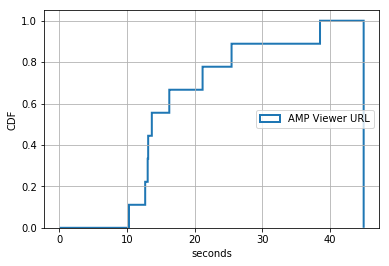

In [141]:
n_bins = 5000

fig, ax = plt.subplots(figsize=(6, 4))
labels = ['AMP Viewer URL']

# plot the cumulative histogram
n, bins, patches = ax.hist([df_amp_viewer_results['PageLoadTime'].astype(np.int)/1000
                           ], 
                           n_bins, density=1, histtype='step', linewidth=2, 
                           range=[0,45],
                           cumulative=True, label=labels)

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
#ax.set_title('Page Load Time by URL Type')
ax.set_xlabel('seconds')
ax.set_ylabel('CDF')

#plt.savefig("data/plots/CDF_PageLoadTime.pdf")
plt.show()